In [1]:
import matplotlib.pyplot as plt 
import numpy as np
import pandas as pd
import seaborn as sns


A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.1.3 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "C:\Users\wyu30\anaconda3\lib\runpy.py", line 196, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "C:\Users\wyu30\anaconda3\lib\runpy.py", line 86, in _run_code
    exec(code, run_globals)
  File "C:\Users\wyu30\anaconda3\lib\site-packages\ipykernel_launcher.py", line 18, in <module>
    app.launch_new_instance()
  File "C:\Users\wyu30\anaconda3\lib\site-packages\traitlets\config\application.py", line 1075, in launch_instance
    app.start()
  File "C:\Users\wyu30\anaconda3\lib\site-pac

AttributeError: _ARRAY_API not found


A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.1.3 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "C:\Users\wyu30\anaconda3\lib\runpy.py", line 196, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "C:\Users\wyu30\anaconda3\lib\runpy.py", line 86, in _run_code
    exec(code, run_globals)
  File "C:\Users\wyu30\anaconda3\lib\site-packages\ipykernel_launcher.py", line 18, in <module>
    app.launch_new_instance()
  File "C:\Users\wyu30\anaconda3\lib\site-packages\traitlets\config\application.py", line 1075, in launch_instance
    app.start()
  File "C:\Users\wyu30\anaconda3\lib\site-pac

AttributeError: _ARRAY_API not found

### 1. Data Loading and Preprocessing

In [3]:
data = pd.read_csv('fraud.csv')
data.drop(columns='Unnamed: 0', inplace=True)
data.head(3)

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,21/06/2020 12:14,2.291160e+15,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,Columbia,...,33.9659,-80.9355,333497,Mechanical engineer,19/03/1968,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0
1,21/06/2020 12:14,3.573030e+15,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,Altonah,...,40.3207,-110.4360,302,"Sales professional, IT",17/01/1990,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0
2,21/06/2020 12:14,3.598220e+15,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,Bellmore,...,40.6729,-73.5365,34496,"Librarian, public",21/10/1970,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0


In [4]:
data.shape

(555719, 22)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 555719 entries, 0 to 555718
Data columns (total 22 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   trans_date_trans_time  555719 non-null  object 
 1   cc_num                 555719 non-null  float64
 2   merchant               555719 non-null  object 
 3   category               555719 non-null  object 
 4   amt                    555719 non-null  float64
 5   first                  555719 non-null  object 
 6   last                   555719 non-null  object 
 7   gender                 555719 non-null  object 
 8   street                 555719 non-null  object 
 9   city                   555719 non-null  object 
 10  state                  555719 non-null  object 
 11  zip                    555719 non-null  int64  
 12  lat                    555719 non-null  float64
 13  long                   555719 non-null  float64
 14  city_pop               555719 non-nu

In [6]:
data['is_fraud'].value_counts()

is_fraud
0    553574
1      2145
Name: count, dtype: int64

In [7]:
# convert transaction time into seperate columns
'''
date_time = pd.to_datetime(data['trans_date_trans_time'], format='%d/%m/%Y %H:%M')

data['trans_date'] = date_time.dt.date[0]
data['trans_time'] = date_time.dt.time[0]
'''

"\ndate_time = pd.to_datetime(data['trans_date_trans_time'], format='%d/%m/%Y %H:%M')\n\ndata['trans_date'] = date_time.dt.date[0]\ndata['trans_time'] = date_time.dt.time[0]\n"

In [8]:
# Extract useful numeric features
date_time = pd.to_datetime(data['trans_date_trans_time'], format='%d/%m/%Y %H:%M')

data['year'] = date_time.dt.year
data['month'] = date_time.dt.month
data['day'] = date_time.dt.day
data['hour'] = date_time.dt.hour
data['minute'] = date_time.dt.minute

In [9]:
# convert date of birth to age
from datetime import datetime
data['dob'] = pd.to_datetime(data['dob'], dayfirst = True)
current_date = datetime.now()
data['age'] = (current_date - data['dob']).dt.days // 365

In [10]:
data.drop(columns=['trans_date_trans_time', 'cc_num', 'first', 'last', 'street', 'city_pop', 'dob', 'trans_num'], inplace=True)

In [11]:
data.head(3)

,merchant,category,amt,gender,city,state,zip,lat,long,job,unix_time,merch_lat,merch_long,is_fraud,year,month,day,hour,minute,age
0,fraud_Kirlin and Sons,personal_care,2.86,M,Columbia,SC,29209,33.9659,-80.9355,Mechanical engineer,1371816865,33.986391,-81.200714,0,2020,6,21,12,14,57
1,fraud_Sporer-Keebler,personal_care,29.84,F,Altonah,UT,84002,40.3207,-110.4360,"Sales professional, IT",1371816873,39.450498,-109.960431,0,2020,6,21,12,14,35
2,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,F,Bellmore,NY,11710,40.6729,-73.5365,"Librarian, public",1371816893,40.495810,-74.196111,0,2020,6,21,12,14,54


In [12]:
data.shape

(555719, 20)

In [13]:
# encoding
data['gender'] = data['gender'].map({'M': 0, 'F': 1})

In [14]:
# List of categorical columns you want to frequency encode
cat_cols = ['merchant', 'category', 'city', 'state', 'job']

# Loop through each column and apply frequency encoding
for col in cat_cols:
    freq_map = data[col].value_counts()
    data[col + '_freq'] = data[col].map(freq_map)

In [15]:
data.drop(columns=['merchant', 'category', 'city', 'state', 'job'], inplace=True)

In [16]:
data.head(3)

,amt,gender,zip,lat,long,unix_time,merch_lat,merch_long,is_fraud,year,month,day,hour,minute,age,merchant_freq,category_freq,city_freq,state_freq,job_freq
0,2.86,0,29209,33.9659,-80.9355,1371816865,33.986391,-81.200714,0,2020,6,21,12,14,57,736,39327,640,12541,2430
1,29.84,1,84002,40.3207,-110.4360,1371816873,39.450498,-109.960431,0,2020,6,21,12,14,35,785,39327,837,4658,2535
2,41.28,1,11710,40.6729,-73.5365,1371816893,40.495810,-74.196111,0,2020,6,21,12,14,54,755,36674,1073,35918,2587


In [17]:
data.shape

(555719, 20)

### 3. Model Building and Evaluation

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OrdinalEncoder
from sklearn.pipeline import Pipeline, make_pipeline

In [20]:
# split the data into train and test sets

X = data.drop('is_fraud', axis=1)
y = data['is_fraud']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [21]:
X_train.head(3)

,amt,gender,zip,lat,long,unix_time,merch_lat,merch_long,year,month,day,hour,minute,age,merchant_freq,category_freq,city_freq,state_freq,job_freq
139526,61.74,0,20012,38.9757,-77.0282,1376047844,38.368797,-76.170115,2020,8,9,11,30,54,1118,56370,1517,1517,1098
395747,186.93,1,29911,32.9413,-81.1807,1385219474,32.342834,-81.123567,2020,11,23,15,11,50,703,34574,1151,12541,1971
395119,127.61,0,86018,35.2563,-111.9500,1385204770,36.255327,-112.176851,2020,11,23,11,6,68,1101,52553,414,4592,1272


In [22]:
# handle imbalancing
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)

# apply SMOTE to training data only
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

##### Random Forest Classifier

In [24]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import f1_score

In [25]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(random_state=42)
clf.fit(X_train_resampled, y_train_resampled)

# Predict on test set
y_pred = clf.predict(X_test)

In [26]:
print(y_test.value_counts(normalize=True))

is_fraud
0    0.996167
1    0.003833
Name: proportion, dtype: float64


In [31]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

y_proba_rfc = clf.predict_proba(X_test)[:, 1]

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print("AUC:", roc_auc_score(y_test, y_proba_rfc))

[[110649     69]
 [    83    343]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    110718
           1       0.83      0.81      0.82       426

    accuracy                           1.00    111144
   macro avg       0.92      0.90      0.91    111144
weighted avg       1.00      1.00      1.00    111144

AUC: 0.990400356885195


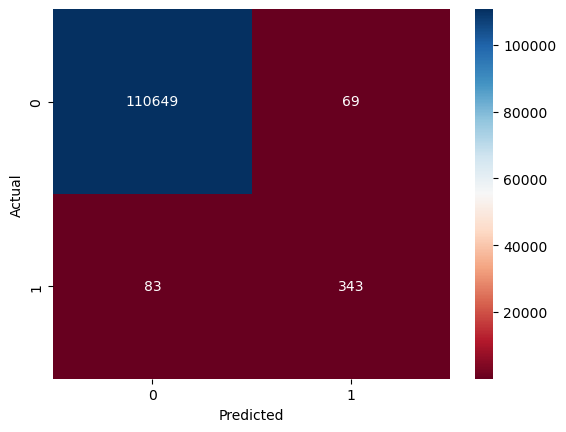

In [51]:
# Confusion Matrix

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='RdBu')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

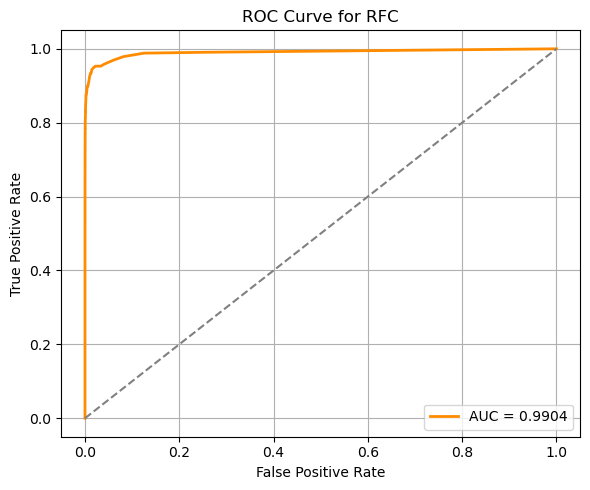

In [65]:
from sklearn.metrics import roc_curve

# Compute FPR, TPR for ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_proba_rfc)
auc_score = roc_auc_score(y_test, y_proba_rfc)

# Plot
plt.figure(figsize=(6,5))
plt.plot(fpr, tpr, label=f'AUC = {auc_score:.4f}', color='darkorange', linewidth=2)
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')  # Diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for RFC')
plt.legend(loc='lower right')
plt.grid(True)
plt.tight_layout()
plt.show()